In [1]:
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import trader 
#data = pd.read_csv('financial_wiki_2017_07_08.csv')

In [2]:
others = pd.read_csv('/Users/ball4308/Desktop/MSc BA/BA Report /financial_wiki_2017_07_08.csv')
others = others[['AAPL','AMZN','GOOGL','MSFT','Date']]
others.head()

,AAPL,AMZN,GOOGL,MSFT,Date
0,112.758286,429.700012,541.700012,39.941715,2015-07-08
1,110.458405,434.390015,544.650024,40.194511,2015-07-09
2,113.411430,443.510010,556.109985,40.275764,2015-07-10
3,115.600922,455.570007,571.729980,41.115414,2015-07-13
4,115.554909,465.570007,584.179993,41.187630,2015-07-14


In [3]:
others['date'] = pd.to_datetime(others['Date'])
others = others.set_index('Date')

In [4]:
test = pd.read_csv('prediction_optimal.csv')
test['date'] = pd.to_datetime(test['date'])
#test = test.set_index('date')
test['predict'] = test['predicted_FB_linear'].shift(-1)
test = test.drop(columns = ['predicted_FB_linear'])
test = test.rename(columns = {"FB" : "current"})
#test = test.set_index('date')
test = test.dropna()

In [5]:
test.head()

,date,current,predict
0,2019-08-06,184.509995,185.028928
1,2019-08-07,185.149994,185.920998
2,2019-08-08,190.160004,190.502076
3,2019-08-09,187.850006,187.398279
4,2019-08-12,185.369995,184.560816


In [6]:
others.head()

,AAPL,AMZN,GOOGL,MSFT,date
Date,,,,,
2015-07-08,112.758286,429.700012,541.700012,39.941715,2015-07-08
2015-07-09,110.458405,434.390015,544.650024,40.194511,2015-07-09
2015-07-10,113.411430,443.510010,556.109985,40.275764,2015-07-10
2015-07-13,115.600922,455.570007,571.729980,41.115414,2015-07-13
2015-07-14,115.554909,465.570007,584.179993,41.187630,2015-07-14


In [7]:
test_port = test.merge(others, left_on = 'date', right_on = 'date', how = 'inner')

In [8]:
test_port.head()

,date,current,predict,AAPL,AMZN,GOOGL,MSFT
0,2019-08-06,184.509995,185.028928,194.326248,1787.829956,1171.079956,132.731888
1,2019-08-07,185.149994,185.920998,196.338562,1793.400024,1175.910034,133.313278
2,2019-08-08,190.160004,190.502076,200.668991,1832.890015,1206.189941,136.870834
3,2019-08-09,187.850006,187.398279,199.015396,1807.579956,1188.900024,135.707993
4,2019-08-12,185.369995,184.560816,198.510406,1784.920044,1174.500000,133.815887


In [10]:
initial_capital = float(100000.0)
initial_holding = 0
share = 25
threshold = 0 
portfolio3 = trader.trading_st3(test_port, initial_capital, initial_holding, share,threshold)
portfolio3 = portfolio3.dropna()
portfolio3.tail()

date     current     predict        AAPL         AMZN        GOOGL  \
0 2019-08-06  184.509995  185.028928  194.326248  1787.829956  1171.079956   
1 2019-08-07  185.149994  185.920998  196.338562  1793.400024  1175.910034   
2 2019-08-08  190.160004  190.502076  200.668991  1832.890015  1206.189941   
3 2019-08-09  187.850006  187.398279  199.015396  1807.579956  1188.900024   
4 2019-08-12  185.369995  184.560816  198.510406  1784.920044  1174.500000   

         MSFT  signal  
0  132.731888       1  
1  133.313278       1  
2  136.870834       1  
3  135.707993      -1  
4  133.815887      -1  


,date,current,predict,AAPL,AMZN,GOOGL,MSFT,signal,cash,holdings,total
249,2020-07-31,253.669998,251.409739,424.275024,3164.679932,1487.949951,204.515610,-1,292091.699600,-25.0,153714.436722
250,2020-08-03,251.960007,251.154543,434.965759,3111.889893,1482.760010,216.017807,-1,292091.699600,-25.0,154651.862717
251,2020-08-04,249.830002,250.546281,437.870514,3138.830078,1473.300049,212.775650,1,16461.384964,25.0,154276.542282
252,2020-08-05,249.119995,249.299345,439.457642,3205.030029,1479.089966,212.426498,1,16461.384964,25.0,156089.488220
253,2020-08-06,265.279999,264.524389,454.790009,3225.000000,1504.949951,215.828278,-1,299753.796768,-25.0,158107.590866


In [11]:
# Print the first lines of `portfolio1`
print('start portfolio:', portfolio3['total'].values[0])
print('final portfolio:', portfolio3['total'].values[-1])
print('total return', (portfolio3['total'].values[-1] - portfolio3['total'].values[0]) / portfolio3['total'].values[0])

start portfolio: 100000.0
final portfolio: 158107.59086608887
total return 0.5810759086608887


In [12]:
portfolio3['returns'] = portfolio3['total'].pct_change()

In [15]:
metrics(portfolio3['returns'])

sharpe_ratio 1.7829100633780517
sortino_ratio 2.685231534393072
max_drawdown  -0.14247907936721446
calmar_ratio 4.03836856446918
tail_ratio 1.3323124151493322


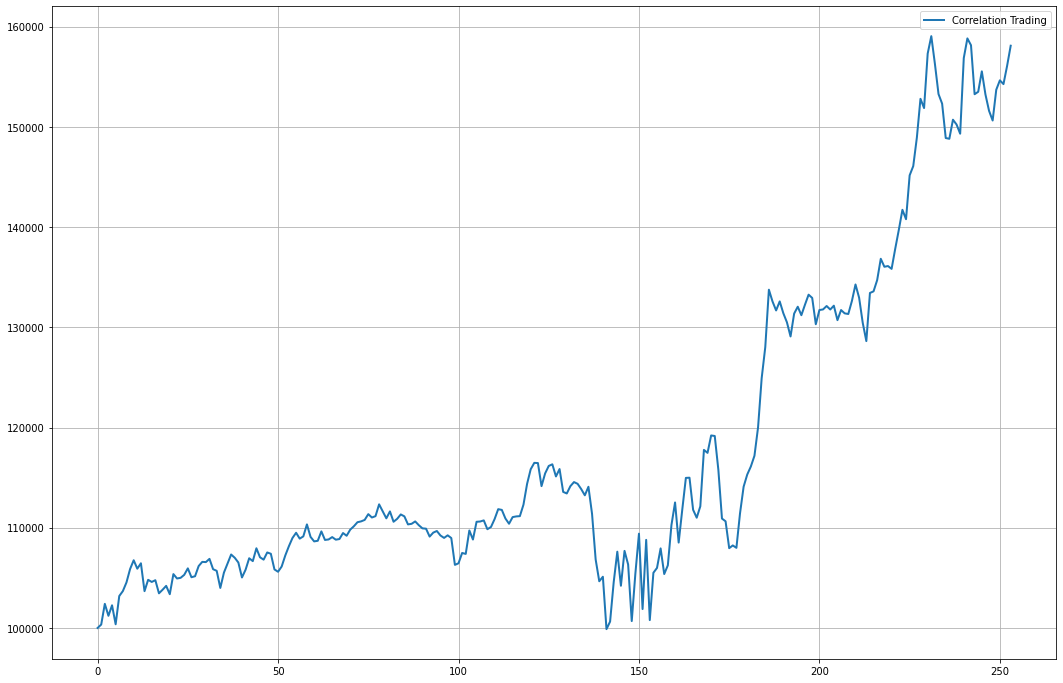

In [16]:
# Create a figure
fig = plt.figure(figsize=(18,12))
portfolio3['total'].plot(label = 'Correlation Trading', linewidth=2)
plt.legend()
plt.grid()
plt.show()


In [73]:
initial_capital = float(100000.0)
initial_holding = 0
share = 100 
risk_threshold = 10/100
portfolio2 = trader.trading_st2(test, initial_capital, initial_holding, share, risk_threshold, threshold =0 )
portfolio2.tail()

0.0 not longed yet
0.0 longed
trade day 0 port 100000.0
0.0 not longed yet
0.0 longed
trade day 1 port 100000.0
0.0 not longed yet
0.0 longed
trade day 2 port 100000.0
145.1727304167605 shorted
trade day 3 port 100000.0
180.9179172448779 shorted
trade day 4 port 100360.02996634883
100 shorted
trade day 5 port 99802.802449964
0.0 not longed yet
0.0 longed
trade day 6 port 100676.8014734015
0.0 not longed yet
0.0 longed
trade day 7 port 100676.8014734015
0.0 not longed yet
0.0 longed
trade day 8 port 100676.8014734015
131.1813361878052 shorted
trade day 9 port 100676.8014734015
126.77147261790367 shorted
trade day 10 port 100986.38950687146
131.9418228040263 shorted
trade day 11 port 101019.34939337561
0.0 not longed yet
0.0 longed
trade day 12 port 101218.58283430405
0.0 not longed yet
0.0 longed
trade day 13 port 101218.58283430405
0.0 not longed yet
0.0 longed
trade day 14 port 101218.58283430405
0.0 not longed yet
0.0 longed
trade day 15 port 101218.58283430405
96.5224332761153 short

,date,current,predict,signal,cash,holdings,total
249,2020-07-31,253.669998,251.409739,-1,195126.696701,-326.025941,112423.696911
250,2020-08-03,251.960007,251.154543,-1,158471.671063,-180.546402,112981.198484
251,2020-08-04,249.830002,250.546281,1,113365.763201,0.000000,113365.763201
252,2020-08-05,249.119995,249.299345,1,113365.763201,0.000000,113365.763201
253,2020-08-06,265.279999,264.524389,-1,159938.576036,-175.560966,113365.763201


In [4]:
test = pd.read_csv('prediction_optimal.csv')
test['date'] = pd.to_datetime(test['date'])
#test = test.set_index('date')
test['predict'] = test['predicted_FB_linear'].shift(-1)
test = test.drop(columns = ['predicted_FB_linear'])
test = test.rename(columns = {"FB" : "current"})
#test = test.set_index('date')
test = test.dropna()
test.head()

,date,current,predict
0,2019-08-06,184.509995,185.028928
1,2019-08-07,185.149994,185.920998
2,2019-08-08,190.160004,190.502076
3,2019-08-09,187.850006,187.398279
4,2019-08-12,185.369995,184.560816


In [5]:
initial_capital = float(100000.0)
initial_holding = 0
share = 100 
threshold = 0 
portfolio1 = trader.trading_st1(test, initial_capital, initial_holding, share,threshold)
portfolio1 = portfolio1.dropna()
portfolio1.tail()

,date,current,predict,signal,cash,holdings,total
249,2020-07-31,253.669998,251.409739,-1,151790.998840,-100.0,126423.999023
250,2020-08-03,251.960007,251.154543,-1,151790.998840,-100.0,126594.998169
251,2020-08-04,249.830002,250.546281,1,101824.998474,100.0,126807.998657
252,2020-08-05,249.119995,249.299345,1,101824.998474,100.0,126736.997986
253,2020-08-06,265.279999,264.524389,-1,154880.998230,-100.0,128352.998352


In [6]:
portfolio2.tail()

,date,current,predict,signal,cash,holdings,total
249,2020-07-31,253.669998,251.409739,-1,195126.696701,-326.025941,112423.696911
250,2020-08-03,251.960007,251.154543,-1,158471.671063,-180.546402,112981.198484
251,2020-08-04,249.830002,250.546281,1,113365.763201,0.000000,113365.763201
252,2020-08-05,249.119995,249.299345,1,113365.763201,0.000000,113365.763201
253,2020-08-06,265.279999,264.524389,-1,159938.576036,-175.560966,113365.763201


In [7]:
# Print the first lines of `portfolio1`
print('start portfolio:', portfolio1['total'].values[0])
print('final portfolio:', portfolio1['total'].values[-1])
print('total return', (portfolio1['total'].values[-1] - portfolio1['total'].values[0]) / portfolio1['total'].values[0])

start portfolio: 100000.0
final portfolio: 128352.99835205078
total return 0.2835299835205078


In [8]:
# Print the first lines of `portfolio`
print('start portfolio:', portfolio2['total'].values[0])
print('final portfolio:', portfolio2['total'].values[-1])
print('total return', (portfolio2['total'].values[-1] - portfolio2['total'].values[0]) / portfolio2['total'].values[0])

start portfolio: 100000.0
final portfolio: 113365.76320092508
total return 0.13365763200925082


In [9]:
portfolio1 = portfolio1.set_index('date')
portfolio2 = portfolio2.set_index('date')

In [10]:
buy_end_hold =  (portfolio1['current'].values[-1]  - portfolio1['current'].values[0])/portfolio1['current'].values[0]
print('buy & hold percentage return : ', buy_end_hold)

buy & hold percentage return :  0.43775408745930244


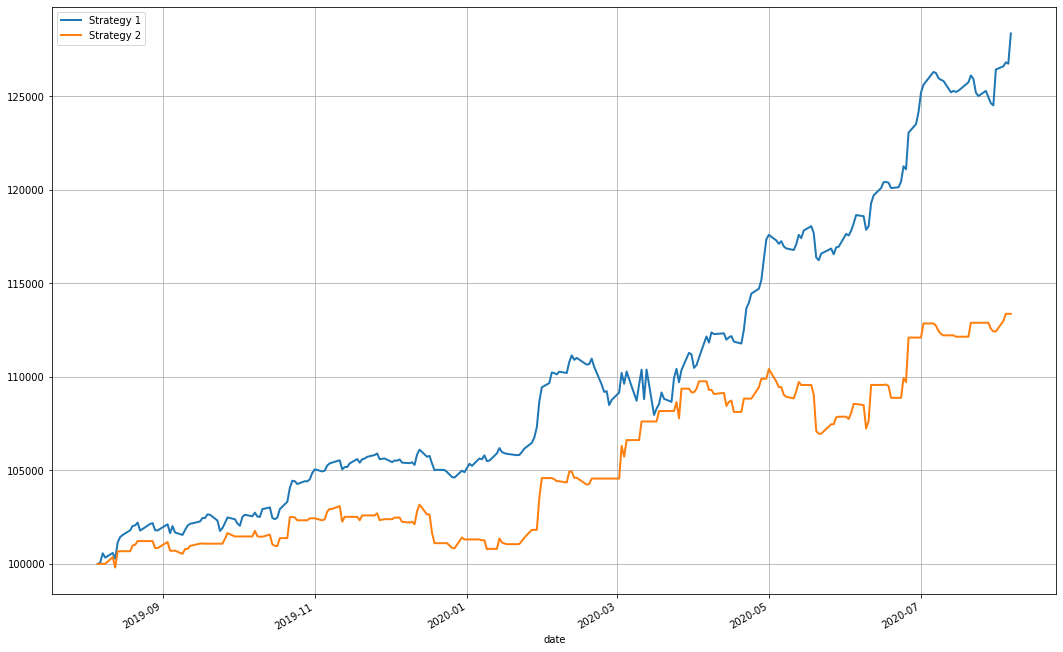

In [19]:
# Create a figure
fig = plt.figure(figsize=(18,12))


portfolio1['total'].plot(label = 'Strategy 1', linewidth=2)
portfolio2['total'].plot(label = 'Strategy 2',linewidth=2)
plt.legend()
plt.grid()
plt.show()


In [13]:
from empyrical import sharpe_ratio 
from empyrical import sortino_ratio
from empyrical import max_drawdown 
from empyrical import calmar_ratio
from empyrical import tail_ratio

In [64]:
def max_drawdown_2(vec):
    maximums = np.maximum.accumulate(vec)
    drawdowns = 1 - vec / maximums
    return np.max(drawdowns)

In [65]:
max_drawdown_2(portfolio1['current'])

0.345921259233249

In [68]:
max_drawdown(portfolio1['current'].pct_change())

-0.34592125923324857

In [44]:
portfolio1['total']

date
2019-08-06    100000.000000
2019-08-07    100063.999939
2019-08-08    100565.000916
2019-08-09    100334.001160
2019-08-12    100582.002258
                  ...      
2020-07-31    126423.999023
2020-08-03    126594.998169
2020-08-04    126807.998657
2020-08-05    126736.997986
2020-08-06    128352.998352
Name: total, Length: 254, dtype: float64

In [14]:
def metrics(x): 
    print('sharpe_ratio {}'.format(sharpe_ratio(x)))
    print('sortino_ratio {}'.format(sortino_ratio(x)))
    print('max_drawdown  {}'.format(max_drawdown(x)))
    print('calmar_ratio {}'.format(calmar_ratio(x)))
    print('tail_ratio {}'.format(tail_ratio(x)))

In [33]:
metrics(portfolio1['returns'])

sharpe_ratio 3.6483008342362377
sortino_ratio 6.133940916241163
max_drawdown  -0.028674278676392644
calmar_ratio 9.800062652350107
tail_ratio 1.7017148802319044


In [34]:
metrics(portfolio2['returns'])

sharpe_ratio 2.011532483275684
sortino_ratio 3.682483483046418
max_drawdown  -0.03129873162797858
calmar_ratio 4.234624314289244
tail_ratio 1.3135147202374777


In [69]:
r_bh = portfolio1['current'].pct_change()
metrics(r_bh)

sharpe_ratio 1.0797739813822662
sortino_ratio 1.5486840902407772
max_drawdown  -0.34592125923324857
calmar_ratio 1.253607660397946
tail_ratio 1.0999101196512409


In [41]:
100*portfolio1['current'].pct_change().loc['2019-08-07':]

date
2019-08-07    0.346864
2019-08-08    2.705919
2019-08-09   -1.214765
2019-08-12   -1.320208
2019-08-13    1.661543
                ...   
2020-07-31    8.174839
2020-08-03   -0.674101
2020-08-04   -0.845374
2020-08-05   -0.284196
2020-08-06    6.486835
Name: current, Length: 253, dtype: float64

In [12]:
portfolio1['returns'] = portfolio1['total'].pct_change()
portfolio2['returns'] = portfolio2['total'].pct_change()

In [13]:
sharpe_ratio = portfolio1['returns'].mean()/ portfolio1['returns'].std()
print(sharpe_ratio)
#annuanlised sharpe ratio 
ASR = (252**0.5) * sharpe_ratio
print(ASR)

0.22982135036520393
3.6483008342362377


In [14]:
sharpe_ratio = portfolio2['returns'].mean()/ portfolio2['returns'].std()
print(sharpe_ratio)
#annuanlised sharpe ratio 
ASR = (252**0.5) * sharpe_ratio
print(ASR)

0.12671463583037265
2.011532483275684


In [15]:
# buy and hold shapre ratio 
sharpe_ratio = portfolio1['current'].pct_change().mean()/ portfolio1['current'].pct_change().std()
print(sharpe_ratio)
ASR = (252**0.5) * sharpe_ratio
print(ASR)

0.06801936730703723
1.0797739813822662
